### 1. Loading important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the dataset and understand our features

In [2]:
df = pd.read_csv('Train.csv')
print("We have",df.shape[0],"rows and",df.shape[1],"columns")
df.head()

We have 8523 rows and 12 columns


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. Item_Identifier -> Unique product ID
2. Item_Weight -> Weight of product
3. Item_Fat_Content -> Whether the product is low fat or not
4. Item_Visibility -> The % of total display area of all products in a store allocated to the particular product
5. Item_Type -> The category to which the product belongs
6. Item_MRP -> Maximum Retail Price (list price) of the product
7. Outlet_Identifier -> Unique store ID
8. Outlet_Establishment_Year -> The year in which store was established
9. Outlet_Size -> The size of the store in terms of ground area covered
10. Outlet_Location_Type -> The type of city in which the store is located
11. Outlet_Type -> Whether the outlet is just a grocery store or some sort of supermarket
12. Item_Outlet_Sales -> Sales of the product in the particular store. This is the outcome variable to be predicted

### 3. Check our Data types to make sure that there is no type mismatch

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Data Wrangling
4. #### Identify and handle missing values if we have

In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_test_2 = df[['Outlet_Type','Outlet_Size','Item_Identifier']]
df_grp_2 = df_test_2.groupby(['Outlet_Type','Outlet_Size'], as_index = False,dropna=False).nunique()
df_grp_2

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
1,Grocery Store,NaN,555
2,Supermarket Type1,High,932
3,Supermarket Type1,Medium,930
4,Supermarket Type1,Small,1311
5,Supermarket Type1,NaN,1305
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935


In [6]:
mean = df['Item_Weight'].mean()
df['Item_Weight'].replace(np.nan,mean, inplace = True) # Replacing our missing values with the mean of item weight variable

df['Outlet_Size'].replace(np.nan,"Small", inplace = True) # Replacing our missing values with the mode of outlet size variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 5. Checking our Categorical Values

In [7]:
print(df['Item_Fat_Content'].unique())
df["Item_Fat_Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts().to_frame()

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


,Item_Fat_Content
Low Fat,5517
Regular,3006


.NB We find out that there were many ways for writing "Low Fat" and "Regular" so we solved it by using the replace function

In [8]:
print("Unique Values of Item Type:",df['Item_Type'].unique())
print("Unique Values of Outlet Size:",df['Outlet_Size'].unique())
print("Unique Values of Outlet Location Type:",df['Outlet_Location_Type'].unique())
print("Unique Values of Outlet Type:",df['Outlet_Type'].unique())

Unique Values of Item Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique Values of Outlet Size: ['Medium' 'Small' 'High']
Unique Values of Outlet Location Type: ['Tier 1' 'Tier 3' 'Tier 2']
Unique Values of Outlet Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


## Exploratary Data Analysis (EDA)

In [9]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Small,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,4798,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [10]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


## Univariate Analysis

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

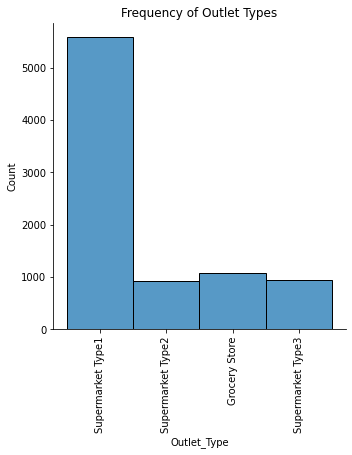

In [11]:
sns.displot(df['Outlet_Type'])
plt.title('Frequency of Outlet Types')
plt.xticks(rotation='vertical')

([0, 1], [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

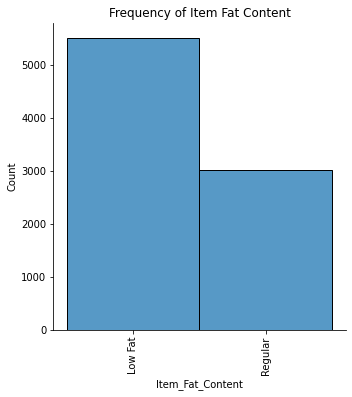

In [12]:
sns.displot(df['Item_Fat_Content'])
plt.title('Frequency of Item Fat Content')
plt.xticks(rotation='vertical')


([0, 1, 2], [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

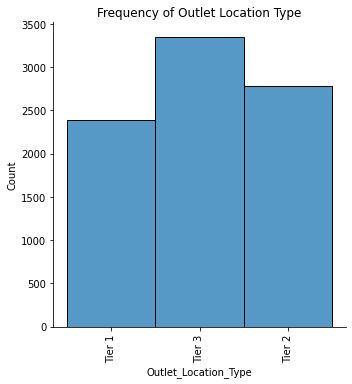

In [13]:
sns.displot(df['Outlet_Location_Type'])
plt.title('Frequency of Outlet Location Type')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

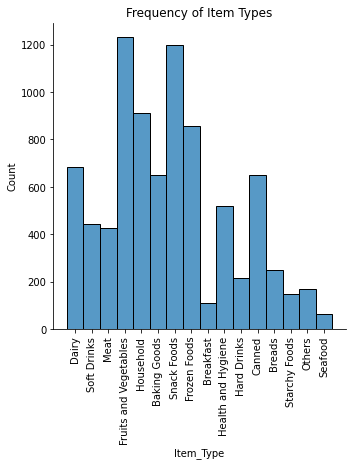

In [14]:
sns.displot(df['Item_Type'])
plt.title('Frequency of Item Types')
plt.xticks(rotation='vertical')

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

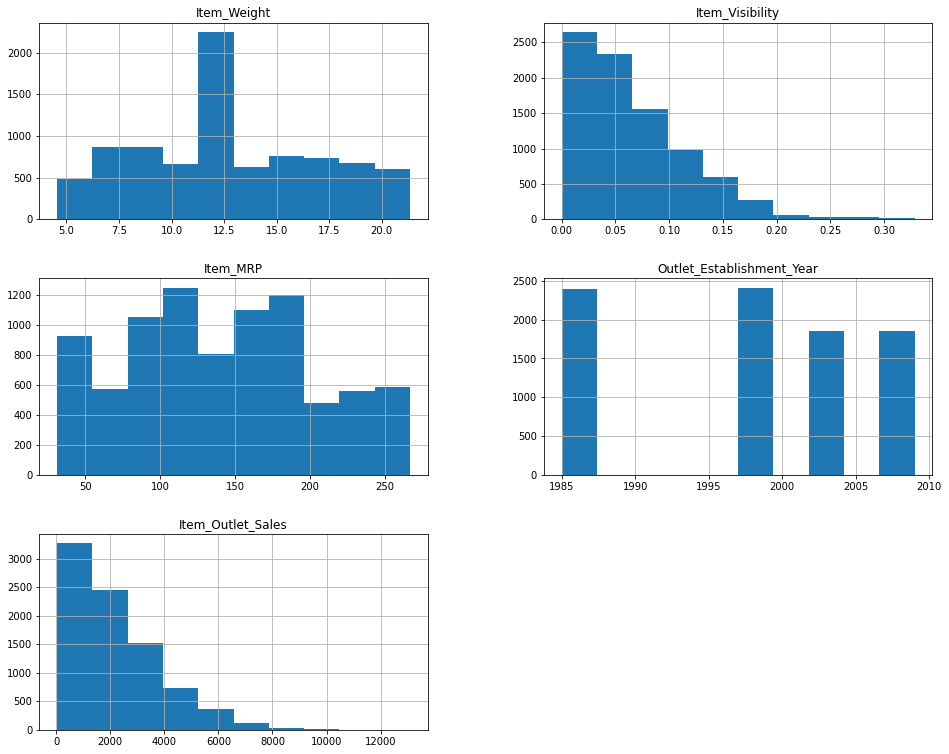

In [15]:
df.hist(figsize=(16,13))

## Other Analysis

In [16]:
df_test = df[['Item_Type','Item_Outlet_Sales']]
df_grp = df_test.groupby(['Item_Type'], as_index = False).mean().sort_values(by='Item_Outlet_Sales',ascending=False)
df_grp

,Item_Type,Item_Outlet_Sales
15,Starchy Foods,2374.332773
12,Seafood,2326.065928
6,Fruits and Vegetables,2289.009592
13,Snack Foods,2277.321739
9,Household,2258.784300
4,Dairy,2232.542597
3,Canned,2225.194904
1,Breads,2204.132226
10,Meat,2158.977911
7,Hard Drinks,2139.221622


#### Here we can find that the Starchy food has the largest outlet sales and then the seafood

In [17]:
df_test = df[['Item_Fat_Content','Item_Type','Item_Outlet_Sales']]
df_grp = df_test.groupby(['Item_Fat_Content','Item_Type'], as_index = False).mean().sort_values(by='Item_Outlet_Sales',ascending=False)
df_grp

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
24,Regular,Seafood,2899.263089
15,Low Fat,Starchy Foods,2558.425815
2,Low Fat,Breakfast,2425.411966
13,Low Fat,Snack Foods,2411.978843
22,Regular,Fruits and Vegetables,2400.571761
20,Regular,Dairy,2370.875970
9,Low Fat,Household,2258.784300
19,Regular,Canned,2243.441202
23,Regular,Meat,2241.218571
17,Regular,Breads,2230.238058


##### We can see that the regular Sea Food has the largest Outlet Sales and then the low fat starchy food

In [18]:
df_test = df[['Outlet_Type','Outlet_Location_Type','Item_Outlet_Sales']]
df_grp = df_test.groupby(['Outlet_Type','Outlet_Location_Type'], as_index = False).mean().sort_values(by='Item_Outlet_Sales',ascending=False)
df_grp

,Outlet_Type,Outlet_Location_Type,Item_Outlet_Sales
6,Supermarket Type3,Tier 3,3694.038558
3,Supermarket Type1,Tier 2,2323.990559
2,Supermarket Type1,Tier 1,2313.099451
4,Supermarket Type1,Tier 3,2298.995256
5,Supermarket Type2,Tier 3,1995.498739
0,Grocery Store,Tier 1,340.329723
1,Grocery Store,Tier 3,339.351662


#### The Supermarket Type 3 in Tier 3 have the largest Outlet sales

In [20]:
df_test = df[['Outlet_Type','Item_Type','Item_Outlet_Sales']]
df_grp = df_test.groupby(['Item_Type','Outlet_Type'], as_index = False).mean().sort_values(by='Item_Outlet_Sales',ascending=False)
df_grp

,Item_Type,Outlet_Type,Item_Outlet_Sales
11,Breakfast,Supermarket Type3,4584.759327
27,Fruits and Vegetables,Supermarket Type3,4114.487061
19,Dairy,Supermarket Type3,3915.182245
43,Meat,Supermarket Type3,3862.293911
39,Household,Supermarket Type3,3821.207782
...,...,...,...
60,Starchy Foods,Grocery Store,300.122154
0,Baking Goods,Grocery Store,292.082544
44,Others,Grocery Store,288.094126
28,Hard Drinks,Grocery Store,243.155708


#### We can see that the breakfast type at Supermarket Type3 has the largest outlet sales and then fruits and vegetables types

## Encoding Categorical Values to Numerical Values 

In [21]:
categorical_cols = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

df = pd.get_dummies(df, columns=categorical_cols)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Modeling
#### Linear Regression

In [22]:
X = df.drop(labels = ["Item_Outlet_Sales","Item_Identifier"],axis=1)
y_train = df["Item_Outlet_Sales"]
X.shape,y_train.shape

((8523, 42), (8523,))

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(X)
X_train = pd.DataFrame(x_scaled_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=44,shuffle=True)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('R2 score:', r2_score(y_test, predictions))

Mean Absolute Error: 816.297820023465
R2 score: 0.5770568905009508


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, preds))
print('R2 score:', r2_score(y_test, preds))

Mean Absolute Error: 766.9366786413766
R2 score: 0.5799735736836569


#### XGboost

In [25]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=False)

predictions_2 = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_2, y_test)))
print('R2 score:', r2_score(y_test, predictions_2))

C:\Users\A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 735.8395311198713
R2 score: 0.6121525641905174


## Predicting Test Values using XGBRegressor

### We are using the XGBReggressor as it gave us the best results in the mean absolute error and R2 Score

In [26]:
x_test = pd.read_csv('Test.csv')
print(x_test.isna().sum())
x_test.head()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
mean_test = x_test['Item_Weight'].mean()
x_test['Item_Weight'].replace(np.nan,mean_test, inplace = True) # Replacing our missing values with the mean of item weight variable
mode_test = x_test['Outlet_Size'].mode()
x_test['Outlet_Size'].replace(np.nan,mode_test[0], inplace = True) # Replacing our missing values with the mode of outlet size variable
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [28]:
print(x_test['Item_Fat_Content'].unique())
x_test["Item_Fat_Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

x_test = pd.get_dummies(x_test, columns=categorical_cols)
x_test.head()

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,1999,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,87.3198,2007,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600000,0.099575,241.7538,1998,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,2007,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.695633,0.118599,234.2300,1985,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
x_test = x_test.drop(labels = ["Item_Identifier"],axis=1)
x_test.shape

(5681, 42)

In [30]:
predictions = my_model.predict(x_test)
np.savetxt("Predictions.csv", 
           predictions,
           delimiter =", ", 
           fmt ='% s')
predictions[:10]

array([3168.3594 , 3506.5261 ,  592.90594, 3265.4062 , 3587.013  ,
       3521.4753 , 3330.5427 , 3208.8782 , 3405.3765 , 3385.168  ],
      dtype=float32)